# Machine Learning and Data Analysis

### Project - Autonomous Driving and Obstacle avoidance using Machine Learning algorithm in ROS

### Description of the Project
The Turtlebot robot is a popular platform for robotics research and education. With its sensors, cameras, and actuators, it provides a great platform for testing and developing algorithms for robot navigation and control. One of the key challenges in robotics is autonomous driving and obstacle avoidance, which involves navigating in an environment with unknown obstacles and avoiding collisions. This project aims to address this challenge by using machine learning algorithms to train the Turtlebot robot to avoid obstacles.

To implement obstacle avoidance, we start by collecting data using the Turtlebot's laser range finder. This sensor measures the distance to obstacles in the environment and provides a 2D scan of the surroundings. We use this data to train various machine learning classifiers such as Random Forest, KNN, MLP, AdaBoost, Logistic Regression, Gradient Boosting, Extra Tree and Decision Trees. These classifiers learn to classify the environment into obstacle and non-obstacle regions based on the laser scan data. Once the classifiers are trained, we use them to implement obstacle avoidance in the Turtlebot robot. This allows the robot to navigate autonomously in an unknown environment, avoiding obstacles in its path. By using machine learning, we can create intelligent robots that can adapt to different environments and tasks, making them more useful and versatile.

## Headers
Headers that are used in the entire package are given below.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib
import seaborn as sns
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
from sklearn.utils import shuffle
from sklearn.metrics import precision_recall_curve, average_precision_score, accuracy_score, precision_score, classification_report, recall_score, f1_score, multilabel_confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, learning_curve, validation_curve, KFold
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier, GradientBoostingRegressor, AdaBoostClassifier, AdaBoostRegressor, ExtraTreesClassifier, ExtraTreesRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.svm import SVC, SVR
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression, Ridge, Lasso, ElasticNet, LogisticRegressionCV
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

## Data Preprocessing
This code block is a Python script that reads in data from a CSV file named "data.csv". The CSV file contains 120 columns of numerical data labeled "x_0" through "x_119", as well as two additional columns labeled "v" and "w".

The script first replaces any occurrences of infinity in the data with the value 3.5. It then modifies the values in the "v" and "w" columns according to the following rules: any rows where "v" equals 0.3 will have their "v" value replaced with 1 and their "w" value replaced with 0, and any rows where "w" equals 0.3 will have their "w" value replaced with 1 and their "v" value replaced with 0.

The script then splits the DataFrame into two arrays, X and y, where X contains all columns except for "v" and "w" and y contains only the "v" and "w" columns. The "v" and "w" columns are transformed into integer labels using the np.argmax() function.

In [2]:
# Read data
columns = []
for i in range(120):
    columns.append(f'x_{i}')

columns = columns + ['v', 'w']

df = pd.read_csv('data.csv')
df.replace([np.inf], 3.5, inplace=True)

df.columns = columns
df.loc[df['v'] == 0.3, "v"] = 1
df.loc[df['v'] == 0.3, "w"] = 0
df.loc[df['w'] == 0.3, "v"] = 0
df.loc[df['w'] == 0.3, "w"] = 1

print("Raw Data")
print(df.head(5))
print(f"Number of Data Entries: {len(df)}")
print(f"Number of v Entries: {len(df[df['v'] == 1])}")
print(f"Number of w Entries: {len(df[df['w'] == 1])}")

# Split into features and labels
X = df.drop(['v', 'w'], axis=1).values # extract features
y = df[['v', 'w']].values # extract labels
y = np.argmax(y, axis=1)

# Verifying the data after preprocessing

# Check the shape of X and y
print('X shape:', X.shape)
print('y shape:', y.shape)

# Check the data types of X and y
print('X data types:', X.dtype)
print('y data types:', y.dtype)

# Check the range of values for X and y
print('X range:', X.min(), X.max())
print('y range:', y.min(), y.max())

# Check for missing values in X and y
print('Number of missing values in X:', np.isnan(X).sum())
print('Number of missing values in y:', np.isnan(y).sum())

Raw Data
        x_0       x_1       x_2       x_3       x_4       x_5       x_6  \
0  1.590204  1.602161  1.581147  1.600504  1.597914  1.577481  1.593620   
1  1.519810  1.546991  1.526143  1.539950  1.532496  1.537885  1.547140   
2  1.484817  1.465451  1.465208  1.466603  1.472045  1.488164  1.475176   
3  1.406087  1.403883  1.405478  1.396614  1.401159  1.416241  1.417860   
4  1.346545  1.342163  1.357281  1.345461  1.356633  1.360663  1.353894   

        x_7       x_8       x_9  ...     x_112     x_113     x_114     x_115  \
0  1.613339  1.601755  1.600173  ...  1.610716  1.608843  1.589687  1.604537   
1  1.535099  1.533105  1.559243  ...  1.526062  1.533277  1.530861  1.530371   
2  1.487901  1.493488  1.491741  ...  1.475144  1.487471  1.499951  1.474804   
3  1.417356  1.424088  1.414250  ...  1.422196  1.412065  1.412352  1.407603   
4  1.360166  1.375422  1.366590  ...  1.354234  1.346220  1.362369  1.356384   

      x_116     x_117     x_118     x_119    v    w  
0  1.

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Classifiers used in the project
The project uses the following classifiers in the code:
1. Decision Tree Classifier
2. Random Forest Classifier
3. K-Nearest Neighbors Classifier
4. MLP Classifier
5. Logistic Regression Classifier
6. Gradient Boosting Classifier
7. AdaBoost Classifier
8. Extra Tree Classifier


This code block trains several machine learning models using hyperparameter tuning with randomized search cross-validation. The models trained include Decision Tree Classifier, Random Forest Classifier, K-Nearest Neighbors Classifier, Multi-Layer Perceptron Classifier, Logistic Regression Classifier, Gradient Boosting Classifier, AdaBoost Classifier, and Extra Tree Classifier. The data is split into training and validation sets, and the hyperparameters for each model are randomly searched for using a fixed number of iterations. The best estimator for each model is then selected based on the performance on the validation set.

In [5]:
# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Reduce the number of iterations for RandomizedSearchCV
n_iter = 10

# Decision Tree Classifier
dt_model = DecisionTreeClassifier()
dt_params = {'max_depth': randint(5, 20)}
dt_random = RandomizedSearchCV(dt_model, dt_params, cv=5, n_jobs=-1, n_iter=n_iter)
dt_random.fit(X_train, y_train)
dt_model = dt_random.best_estimator_

# Random Forest Classifier
rf_model = RandomForestClassifier()
rf_params = {'n_estimators': randint(100, 500),
             'max_depth': randint(5, 20)}
rf_random = RandomizedSearchCV(rf_model, rf_params, cv=5, n_jobs=-1, n_iter=n_iter)
rf_random.fit(X_train, y_train)
rf_model = rf_random.best_estimator_

# K-Nearest Neighbors Classifier
knn_model = KNeighborsClassifier()
knn_params = {'n_neighbors': randint(1, 21)}
knn_random = RandomizedSearchCV(knn_model, knn_params, cv=5, n_jobs=-1, n_iter=n_iter)
knn_random.fit(X_train, y_train)
knn_model = knn_random.best_estimator_

nn_model = MLPClassifier(hidden_layer_sizes=(100, 2), activation='relu', solver='adam', max_iter=2000)
nn_params = {'hidden_layer_sizes': [(100,), (100, 2), (100, 5)],
             'alpha': uniform(0.0001, 0.01)}
nn_random = RandomizedSearchCV(nn_model, nn_params, cv=5, n_jobs=-1, n_iter=n_iter)
nn_random.fit(X_train, y_train)
nn_model = nn_random.best_estimator_

# Logistic Regression Classifier
lr_model = LogisticRegression(solver='saga', max_iter=2500)
lr_params = {'C': randint(1, 10)}
lr_rand = RandomizedSearchCV(lr_model, lr_params, cv=5, n_jobs=-1, n_iter=n_iter)
lr_rand.fit(X_train, y_train)
lr_model = lr_rand.best_estimator_

# Gradient Boosting Classifier
gb_model = GradientBoostingClassifier()
gb_params = {'n_estimators': randint(50, 200),
             'max_depth': randint(3, 8)}
gb_rand = RandomizedSearchCV(gb_model, gb_params, cv=5, n_jobs=-1, n_iter=n_iter)
gb_rand.fit(X_train, y_train)
gb_model = gb_rand.best_estimator_

# AdaBoost Classifier
ada_model = AdaBoostClassifier()
ada_params = {'n_estimators': randint(50, 200),
              'learning_rate': uniform(0.01, 1)}
ada_rand = RandomizedSearchCV(ada_model, ada_params, cv=5, n_jobs=-1, n_iter=n_iter)
ada_rand.fit(X_train, y_train)
ada_model = ada_rand.best_estimator_

# Extra Tree Classifier
et_model = ExtraTreesClassifier()
et_params = {'n_estimators': randint(100, 500),
             'max_depth': randint(5, 20)}
et_rand = RandomizedSearchCV(et_model, et_params, cv=5, n_jobs=-1, n_iter=n_iter)
et_rand.fit(X_train,y_train)
et_model=et_rand.best_estimator_

In [6]:
import os

# create directory if it does not exist
if not os.path.exists('results'):
    os.makedirs('results')
if not os.path.exists('models'):
    os.makedirs('models')

In [9]:
%%capture

# Save all models as joblib files
joblib.dump(dt_model, 'models/dt_model.joblib')
joblib.dump(rf_model, 'models/rf_model.joblib')
joblib.dump(knn_model, 'models/knn_model.joblib')
joblib.dump(nn_model, 'models/nn_model.joblib')
joblib.dump(lr_model, 'models/lr_model.joblib')
joblib.dump(gb_model, 'models/gb_model.joblib')
joblib.dump(ada_model, 'models/ada_model.joblib')
joblib.dump(et_model, 'models/et_model.joblib')

In [10]:
models_list = [dt_model, rf_model, knn_model, nn_model, lr_model, gb_model, ada_model, et_model]

## Model Evaluation
This code defines a function called evaluate_models which takes as input a list of models, test data, a file path to write results to, and an optional flag to print results to console. For each model in the input list, the function calculates evaluation metrics including accuracy, precision, recall, F1 score, and ROC AUC score. The function also writes a confusion matrix and classification report to the output file for each model. If the print_console flag is True, the function also prints the same results to the console. Finally, the function prints a message indicating where the evaluation metrics were written to.

In [11]:
def evaluate_models(models_list, X_test, y_test, file_path, print_console = False):
    
    with open(file_path, 'w') as f:
        
        for i, model in enumerate(models_list):
            
            y_pred = model.predict(X_test)
            
            accuracy = accuracy_score(y_test, y_pred)
            precision = precision_score(y_test, y_pred)
            recall = recall_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred)
            y_score = model.predict_proba(X_test)[:, 1]
            roc_auc = roc_auc_score(y_test, y_score)
            
            f.write(f'\t\tModel {i+1}: {model.__class__.__name__}\n')
            f.write(f'Accuracy: {accuracy:.4f}\n')
            f.write(f'Precision: {precision:.4f}\n')
            f.write(f'Recall: {recall:.4f}\n')
            f.write(f'F1 score: {f1:.4f}\n')
            f.write(f'ROC AUC score: {roc_auc:.4f}\n\n')
            
            f.write(f'Confusion Matrix:\n')
            f.write(f'{confusion_matrix(y_test, y_pred)}\n\n')
            
            f.write(f'Classification Report:\n')
            f.write(f'{classification_report(y_test, y_pred)}\n')
            f.write('_____________________________________________________________________')
            f.write('\n')
            
            if(print_console == True):
                print(f'\t\tModel {i+1}: {model.__class__.__name__}')
                print(f'Accuracy: {accuracy:.4f}')
                print(f'Precision: {precision:.4f}')
                print(f'Recall: {recall:.4f}')
                print(f'F1 score: {f1:.4f}')
                print(f'ROC AUC score: {roc_auc:.4f}\n')

                print('Confusion Matrix:\n')
                print(f'{confusion_matrix(y_test, y_pred)}\n')

                print('Classification Report:\n')
                print(f'{classification_report(y_test, y_pred)}\n')
                print('_____________________________________________________________________')
                print('\n')
            
    print(f'Evaluation metrics written to \"{file_path}\"')

evaluate_models(models_list, X_test, y_test, 'results/evaluation_metrics.txt', print_console = True)

		Model 1: DecisionTreeClassifier
Accuracy: 0.8172
Precision: 0.8836
Recall: 0.8294
F1 score: 0.8556
ROC AUC score: 0.8468

Confusion Matrix:

[[ 915  237]
 [ 370 1799]]

Classification Report:

              precision    recall  f1-score   support

           0       0.71      0.79      0.75      1152
           1       0.88      0.83      0.86      2169

    accuracy                           0.82      3321
   macro avg       0.80      0.81      0.80      3321
weighted avg       0.82      0.82      0.82      3321


_____________________________________________________________________


		Model 2: RandomForestClassifier
Accuracy: 0.8609
Precision: 0.9219
Recall: 0.8598
F1 score: 0.8898
ROC AUC score: 0.9366

Confusion Matrix:

[[ 994  158]
 [ 304 1865]]

Classification Report:

              precision    recall  f1-score   support

           0       0.77      0.86      0.81      1152
           1       0.92      0.86      0.89      2169

    accuracy                           0.86   

## Plotting

1. Accuracy, Precision, Recall, F1 Score, ROC-AUC scores
2. ROC Curve
3. Confusion Matrix
4. Precision-Recall Curve
5. Learning Curve

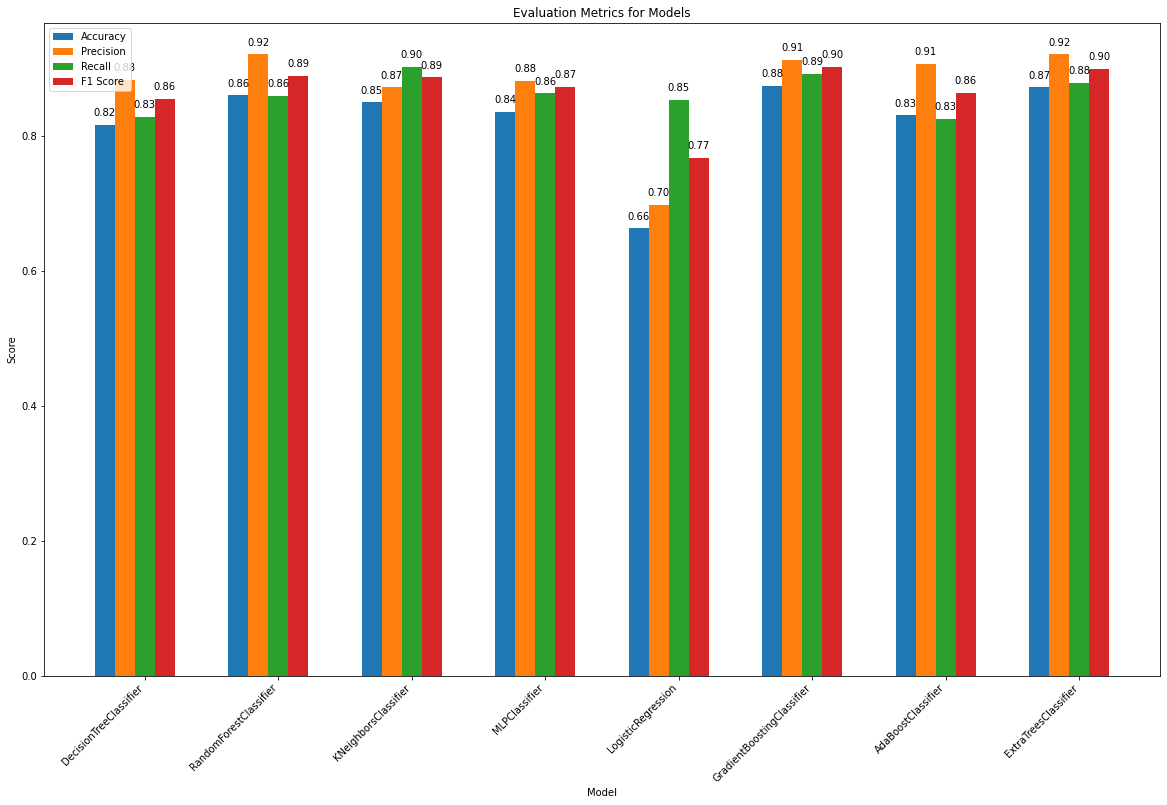

In [12]:
def plot_evaluation_metrics(models_list, X_test, y_test):
    
    accuracy_scores = []
    precision_scores = []
    recall_scores = []
    f1_scores = []
    roc_auc_scores = []
    
    for model in models_list:
        
        y_pred = model.predict(X_test)
        
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        y_score = model.predict_proba(X_test)[:, 1]
#         roc_auc = roc_auc_score(y_test, y_score)
        
        accuracy_scores.append(accuracy)
        precision_scores.append(precision)
        recall_scores.append(recall)
        f1_scores.append(f1)
#         roc_auc_scores.append(roc_auc)
        
    # Create a bar chart of the evaluation metrics for each model
    x_pos = np.arange(len(models_list))
    width = 0.15
    
    fig, ax = plt.subplots(figsize=(20, 12))
    
    ax.bar(x_pos - 2*width, accuracy_scores, width, label='Accuracy')
    ax.bar(x_pos - width, precision_scores, width, label='Precision')
    ax.bar(x_pos, recall_scores, width, label='Recall')
    ax.bar(x_pos + width, f1_scores, width, label='F1 Score')
#     ax.bar(x_pos + 2*width, roc_auc_scores, width, label='ROC AUC')
    
    # Add the metric values above each bar
    for i in range(len(models_list)):
        ax.text(x_pos[i] - 2*width, accuracy_scores[i] + 0.01, f'{accuracy_scores[i]:.2f}', rotation=0, ha='center', va='bottom')
        ax.text(x_pos[i] - width, precision_scores[i] + 0.01, f'{precision_scores[i]:.2f}', rotation=0, ha='center', va='bottom')
        ax.text(x_pos[i], recall_scores[i] + 0.01, f'{recall_scores[i]:.2f}', rotation=0, ha='center', va='bottom')
        ax.text(x_pos[i] + width, f1_scores[i] + 0.01, f'{f1_scores[i]:.2f}', rotation=0, ha='center', va='bottom')
#         ax.text(x_pos[i] + 2*width, roc_auc_scores[i] + 0.01, f'{roc_auc_scores[i]:.3f}', rotation=0, ha='center', va='bottom')
        
    ax.set_xticks(x_pos)
    ax.set_xticklabels([model.__class__.__name__ for model in models_list], rotation=45, ha='right')
    ax.set_xlabel('Model')
    ax.set_ylabel('Score')
    ax.set_title('Evaluation Metrics for Models')
    ax.legend()   
    # Save the figure to the 'results' folder
    plt.savefig('results/performance_metrics.png', dpi=300, bbox_inches='tight')
    plt.show()


plot_evaluation_metrics(models_list, X_test, y_test)

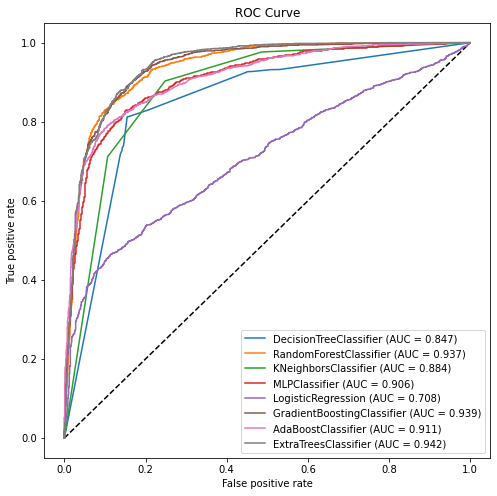

In [13]:
def plot_roc_curves(models_list, X_test, y_test):
    
    plt.figure(figsize=(8,8))
    plt.plot([0, 1], [0, 1], 'k--')
    
    for model in models_list:
        y_pred_proba = model.predict_proba(X_test)[:,1]
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        auc_score = roc_auc_score(y_test, y_pred_proba)
        plt.plot(fpr, tpr, label='{} (AUC = {:.3f})'.format(model.__class__.__name__, auc_score))
    
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    # Save the figure to the 'results' folder
    plt.savefig('results/roc_curves.png', dpi=300, bbox_inches='tight')
    plt.show()
    
plot_roc_curves(models_list, X_test, y_test)

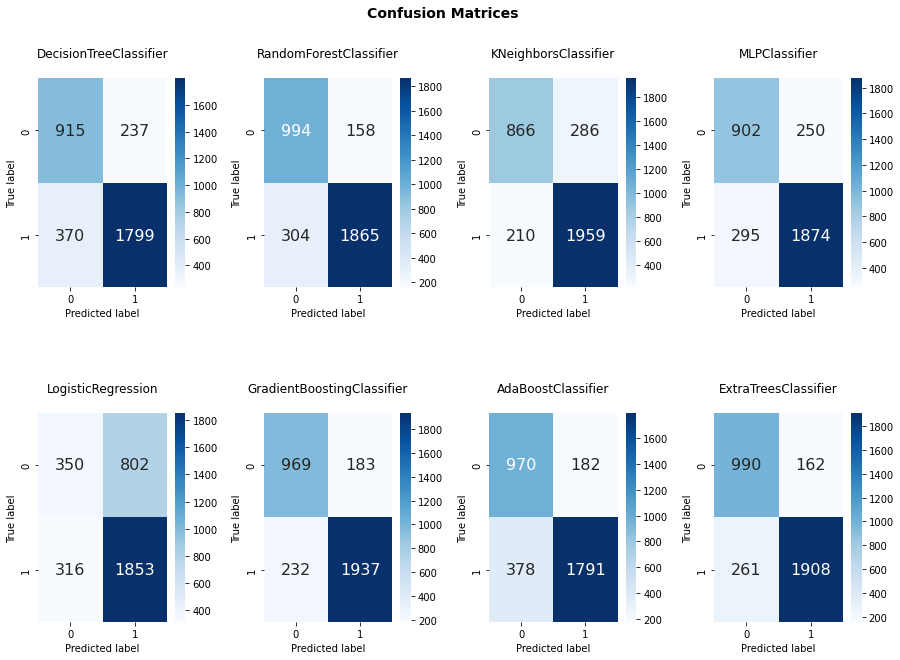

In [14]:
def plot_confusion_matrices(models_list, X_test, y_test):
    
    plt.figure(figsize=(15,10))
    plt.subplots_adjust(wspace=0.4, hspace=0.6)
    plt.suptitle('Confusion Matrices', fontsize=14, fontweight='bold')
    
    for i, model in enumerate(models_list):
        y_pred = model.predict(X_test)
        cm = confusion_matrix(y_test, y_pred)
        tn, fp, fn, tp = cm.ravel()
        ax = plt.subplot(2, 4, i+1)
        sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', annot_kws={"size": 16})
        ax.set_title('{0}\n'.format(model.__class__.__name__),
                                                       fontdict={'fontsize': 12})

        ax.set_xlabel('Predicted label')
        ax.set_ylabel('True label')
    # Save the figure to the 'results' folder
    plt.savefig('results/confusion_matrix.png', dpi=300, bbox_inches='tight')
    plt.show()

plot_confusion_matrices(models_list, X_test, y_test)

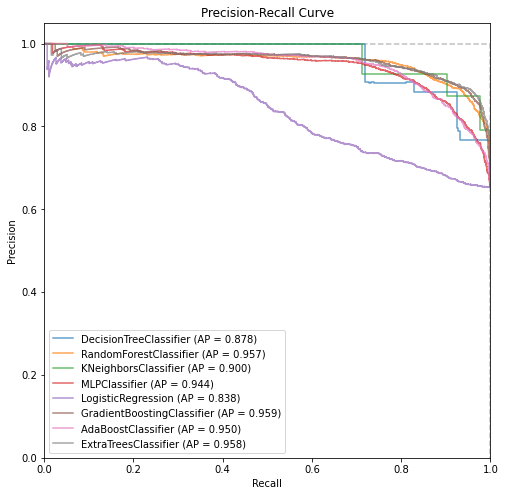

In [15]:
def plot_precision_recall_curve(models_list, X_test, y_test):
    plt.figure(figsize=(8, 8))
    plt.step([0, 1], [1, 0], linestyle='--', color='gray', alpha=0.5, where='post')
    for model in models_list:
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
        aps = average_precision_score(y_test, y_pred_proba)
        plt.step(recall, precision, alpha=0.7, label=f'{model.__class__.__name__} (AP = {aps:.3f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.legend(loc='lower left')
    plt.title('Precision-Recall Curve')
    # Save the figure to the 'results' folder
    plt.savefig('results/precision_recall_curve.png', dpi=300, bbox_inches='tight')
    plt.show()

plot_precision_recall_curve(models_list, X_test, y_test) 

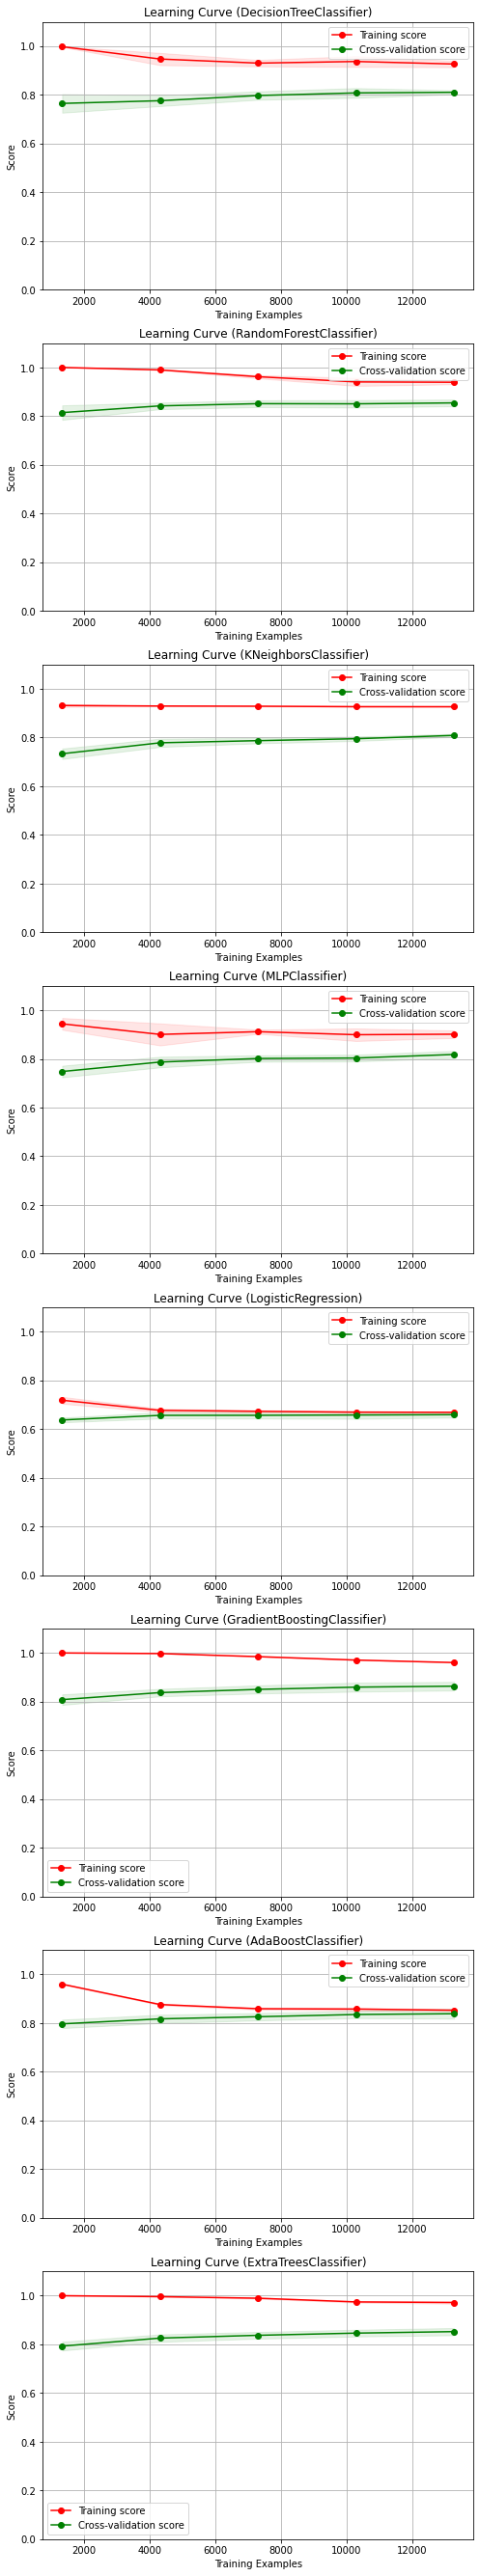

In [16]:
# Define a function to plot learning curves


def plot_learning_curves(models, X, y):
    # Compute the number of models
    n_models = len(models)
    
    # Create a figure with n_models rows and one column
    fig, axes = plt.subplots(n_models, 1, figsize=(8, 6*n_models))
    
    # Loop through each model and plot its learning curve.
    for i, model in enumerate(models):
        # Compute the learning curve for the current model.
        train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5, n_jobs=-1, random_state=42)
        
        # Compute the mean and standard deviation of the training scores and test scores.
        train_scores_mean = np.mean(train_scores, axis=1)
        train_scores_std = np.std(train_scores, axis=1)
        test_scores_mean = np.mean(test_scores, axis=1)
        test_scores_std = np.std(test_scores, axis=1)
        
        # Plot the learning curve for the current model.
        ax = axes[i]
        ax.set_title(f"Learning Curve ({type(model).__name__})")
        ax.set_xlabel("Training Examples")
        ax.set_ylabel("Score")
        ax.set_ylim(0.0, 1.1)
        ax.grid()
        
        ax.fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1, color="r")
        ax.fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1, color="g")
        
        ax.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
        ax.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
        
        ax.legend(loc="best")
    
    # Save the figure to the 'results' folder
    plt.savefig('results/learning_curves.png', dpi=300, bbox_inches='tight')
    plt.show()

# Call the function with your models list and data
plot_learning_curves(models_list, X, y)